In [2]:
from sklearn.decomposition import PCA

In [3]:
from PIL import Image
import numpy as np
from tqdm import tqdm
from scipy.stats.mstats import gmean

In [264]:
image = Image.open('./data/training/sunset_1.jpg')
print(image.size)
#image = image.resize((200, 150))
print(image.size)

(1600, 1200)
(1600, 1200)


In [265]:
pca = PCA(n_components=3)

In [266]:
X = np.array(image).reshape(-1, 3)

In [267]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [274]:
samples = np.random.randint(-1000, 2, size=X.shape[0])
index = np.where(samples > 0, np.ones(shape=X.shape[0]), np.zeros(shape=X.shape[0])).astype(np.int).nonzero()
Y = pca.transform(X[index]).astype(np.int)

In [275]:
Y.shape

(1907, 3)

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

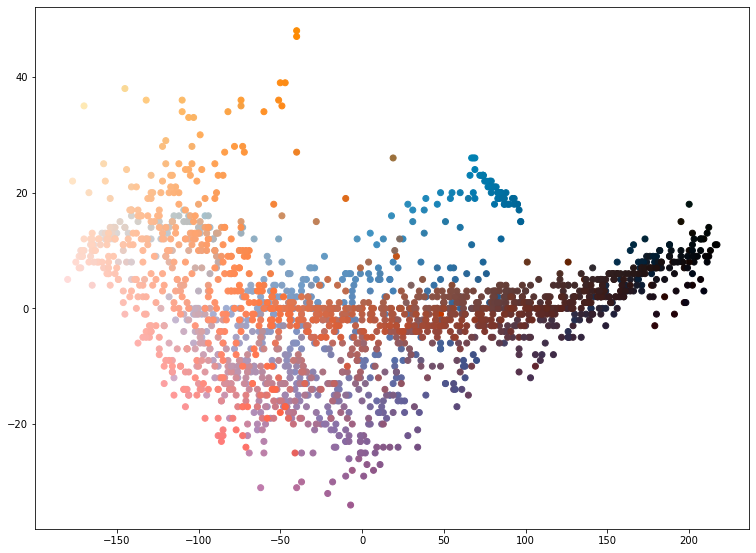

In [285]:
X_pca_0 = Y[:, 0]
X_pca_1 = Y[:, 2]

good_colors = np.where(X_pca_0 < 100)[0]

fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111)

ax.scatter(X_pca_0, X_pca_1, c=X[index]/255)
plt.show()

In [273]:
samples = np.random.randint(-1000, 2, size=X.shape[0])

In [112]:
index = np.where(samples > 0, np.ones(shape=X.shape[0]), np.zeros(shape=X.shape[0])).astype(np.int).nonzero()

In [117]:
# X_pca_0 = Y[index, 0]
# X_pca_1 = np.where(Y[:, 1] < 0)

(1, 22)


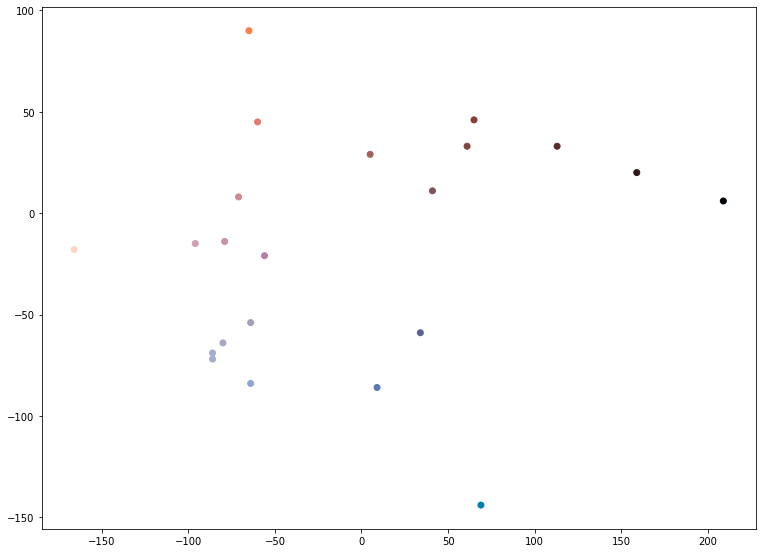

In [119]:

X_pca_0 = Y[index, 0]
X_pca_1 = Y[index, 1]
fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111)
print(X_pca_0.shape)
ax.scatter(X_pca_0, X_pca_1, c=X[index]/255)
plt.show()

In [120]:
from sklearn.cluster import KMeans

In [286]:
cluster = KMeans(10)

In [287]:
cluster.fit(X[index][good_colors]/255)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [288]:
colors = (cluster.cluster_centers_ * 255).astype(np.int)

In [289]:
def get_palette(color_values):
    palette = np.zeros((50, 50 * len(color_values), 3), dtype=np.int)
    for index, color in enumerate(color_values):
        palette[:,index * 50: (index + 1) * 50] = color
    return palette

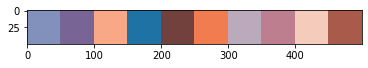

In [290]:
plt.imshow(get_palette(colors))

In [217]:
good_colors = np.where(X_pca_0 < 100)[0]

In [218]:
cluster = KMeans(10)
cluster.fit(X[good_colors]/255)
colors = (cluster.cluster_centers_ * 255).astype(np.int)


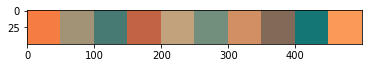

In [219]:
plt.imshow(get_palette(colors))

In [225]:
cluster.transform(colors[0].reshape(1, -1))

array([[282.37665342, 282.57078591, 282.93435143, 282.59058455,
        282.43600857, 282.74157537, 282.43347897, 282.78028481,
        283.10198108, 282.28826527]])

In [260]:
second_image = Image.open('./data/training/sunset_3.jpg')

(50508,)


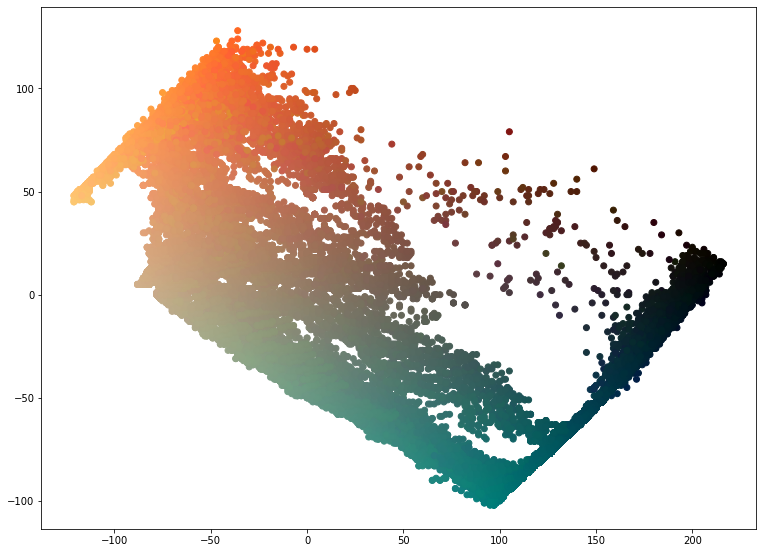

In [261]:
X = np.array(second_image).reshape(-1, 3)
Y = pca.transform(X).astype(np.int)
X_pca_0 = Y[:, 0]
X_pca_1 = Y[:, 1]
fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111)
print(X_pca_0.shape)
ax.scatter(X_pca_0, X_pca_1, c=X/255)
plt.show()

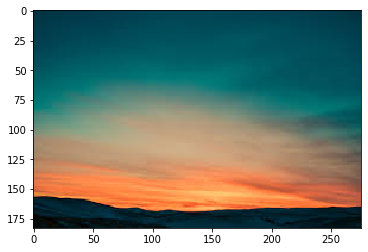

In [258]:
plt.imshow(second_image)

In [24]:
from PIL import Image
import numpy as np
from tqdm import tqdm
from scipy.stats.mstats import gmean
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path

In [25]:
def f0(array):
    return .2*(255 + 255 + 255 - np.sum(array))/3
def f1(array):
    return array.max() - array.min()
def f2(array):
    return 0 if f0(array) >= f1(array) else 1

In [26]:
def get_palette(color_values):
    palette = np.zeros((50, 50 * len(color_values), 3), dtype=np.int)
    for index, color in enumerate(color_values):
        palette[:,index * 50: (index + 1) * 50] = color
    return palette

def get_colors(image: np.ndarray, n_colors: int):
    pca = PCA(n_components=3)
    print(image.shape)
    X = np.array(image).reshape(-1, 3)
    pca.fit(X)
    samples = np.random.randint(-1000, 2, size=X.shape[0])
    index = np.where(samples > 0, np.ones(shape=X.shape[0]), np.zeros(shape=X.shape[0])).astype(np.int).nonzero()


    Y = pca.transform(X[index]).astype(np.int)
    
    X_pca_0 = Y[:, 0]
    X_pca_1 = Y[:, 2]

#     good_colors = np.where(X_pca_0 > 150)[0]
    more_good_colors = np.apply_along_axis(f2, 1, X[index]).nonzero()

    
    # plot samples in eigenspace
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = fig.add_subplot(111)
    ax.scatter(X_pca_0, X_pca_1, c=X[index]/255)
#     ax.figure.savefig('./data/output/kmeans-pca_output.png', format='png')
    plt.show()
    
    cluster = KMeans(n_colors)
#     cluster.fit(X[index][good_colors]/255)
    cluster.fit(X[index][more_good_colors])
    
    colors = (cluster.cluster_centers_).astype(np.int)
    
    clustered_colors = cluster.predict(X[index][more_good_colors])
    print(clustered_colors.shape)
    color_map = dict()
    for label, color in zip(clustered_colors, X[index][more_good_colors]):
        try:
            color_map[label].append(color)
        except KeyError:
            color_map[label] = [color]
    for label, members in color_map.items():
        value = gmean(np.array(members))
        print(label, len(members), value)
        color_map[label] = value
    
    return color_map.values()


(1664, 1368, 3)


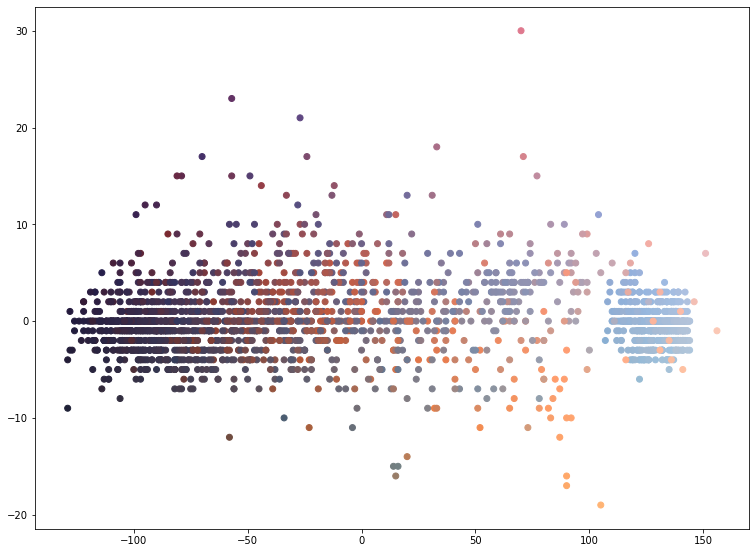

(1275,)
0 319 [152.5 183.2 217.6]
7 256 [167.5 192.  219.4]
8 54 [ 68.75  61.62 101.6 ]
6 115 [142.1 140.  168.1]
2 76 [110.3 101.6 133. ]
5 129 [146.6   77.3   70.94]
9 111 [109.44  59.5   66.6 ]
1 108 [182.5  97.3  76.7]
3 59 [230.8 140.   99.6]
4 48 [212.6 160.5 156.8]


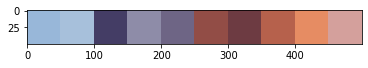

In [37]:
n_colors = 10
path = Path('./data/training/mountain_1.png')
image_name = path.name.split('.')[0]
ax = plt.imshow(get_palette(get_colors(np.array(Image.open(str(path)).convert('RGB')), n_colors)))
ax.figure.savefig(f'./data/output/kmeans_output_{image_name}_{n_colors}.png', format='png')